# Preprocessing

## Convert Categorical Data to Numerical (Encoding)


In [4]:
import pandas as pd
df = pd.read_csv('train_cleaned.csv')

In [5]:
# One-Hot Encoding of Nominal Data
df = pd.get_dummies(df, columns=['Gender', 'Ethnicity', 'Country_region',
                                          'Hotel_Type', 'Meal_Type', 'Deposit_type',
                                          'Booking_channel','Visted_Previously','Previous_Cancellations','Required_Car_Parking','Use_Promotion'], drop_first=True)

# Show the result
print(df)

       Reservation-id  Age Educational_Level       Income Expected_checkin  \
0            39428300   40       High-School         <25K       2015-07-01   
1            77491756   49       High-School  50K -- 100K       2015-07-01   
2            73747291   42           College         <25K       2015-07-02   
3            67301739   25       High-School        >100K       2015-07-02   
4            77222321   62              Grad    25K --50K       2015-07-03   
...               ...  ...               ...          ...              ...   
26985        15645505   49       High-School         <25K       2016-08-31   
26986        56414525   49           College    25K --50K       2016-08-31   
26987        52023375   49           College  50K -- 100K       2016-09-01   
26988        98041387   65           College    25K --50K       2016-08-31   
26989        55243988   48           College    25K --50K       2016-08-31   

      Expected_checkout Booking_date  Adults  Children  Babies 

## Ordinal Encoding for odinal data

In [7]:
from sklearn.preprocessing import OrdinalEncoder

# Make sure the 'Income' column is in a consistent format (strings)
df['Income'] = df['Income'].astype(str)

# Define the expected order of the categories
income_categories = ['<25K', '25K --50K', '50K -- 100K', '>100K']

# Initialize the OrdinalEncoder with the defined categories
encoder = OrdinalEncoder(categories=[income_categories])

# Fit and transform the 'Income' column
df['Income'] = encoder.fit_transform(df[['Income']])
df['Educational_Level'] = df['Educational_Level'].map({
    'Mid-School': 1,
    'College': 2,
    'High-School': 3,
    'Grad': 4
    })

df['Reservation_Status'] = df['Reservation_Status'].map({
    'check-out': 1,
    'canceled': 2,
    'no-show': 3,

    })

In [8]:
df.head()

,Reservation-id,Age,Educational_Level,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,...,Meal_Type_FB,Meal_Type_HB,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Direct,Booking_channel_Online,Visted_Previously_Yes,Previous_Cancellations_Yes,Required_Car_Parking_Yes,Use_Promotion_Yes
0,39428300,40,3,0.0,2015-07-01,2015-07-02,2015-05-21,4,2,0,...,False,False,False,False,False,True,False,False,True,True
1,77491756,49,3,2.0,2015-07-01,2015-07-02,2015-05-26,1,3,0,...,False,False,True,False,False,True,False,False,True,False
2,73747291,42,2,0.0,2015-07-02,2015-07-06,2015-06-29,1,3,0,...,False,False,False,True,False,True,False,False,True,False
3,67301739,25,3,3.0,2015-07-02,2015-07-03,2015-06-20,3,3,0,...,False,False,False,False,False,False,False,False,True,True
4,77222321,62,4,1.0,2015-07-03,2015-07-04,2015-06-20,1,1,0,...,False,False,False,True,True,False,False,False,False,True


In [9]:
df.shape

(26990, 35)

## Feature Engineering


In [10]:
df.columns

Index(['Reservation-id', 'Age', 'Educational_Level', 'Income',
       'Expected_checkin', 'Expected_checkout', 'Booking_date', 'Adults',
       'Children', 'Babies', 'Reservation_Status', 'Discount_Rate',
       'Room_Rate', 'stay_days', 'booking_lead', 'Total_Guests', 'Gender_M',
       'Ethnicity_Asian American', 'Ethnicity_Latino', 'Ethnicity_caucasian',
       'Country_region_North', 'Country_region_South', 'Country_region_West',
       'Hotel_Type_City Hotel', 'Hotel_Type_Resort', 'Meal_Type_FB',
       'Meal_Type_HB', 'Deposit_type_Non-Refundable',
       'Deposit_type_Refundable', 'Booking_channel_Direct',
       'Booking_channel_Online', 'Visted_Previously_Yes',
       'Previous_Cancellations_Yes', 'Required_Car_Parking_Yes',
       'Use_Promotion_Yes'],
      dtype='object')

In [12]:
df.drop(columns=["Reservation-id", "Expected_checkin", "Expected_checkout", "Booking_date"], inplace=True)


In [13]:
df.head()

,Age,Educational_Level,Income,Adults,Children,Babies,Reservation_Status,Discount_Rate,Room_Rate,stay_days,...,Meal_Type_HB,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Direct,Booking_channel_Online,Visted_Previously_Yes,Previous_Cancellations_Yes,Required_Car_Parking_Yes,Use_Promotion_Yes,Booking_Lead_Time
0,40,3,0.0,4,2,0,1,0,106.440241,1,...,False,False,False,False,True,False,False,True,True,41
1,49,3,2.0,1,3,0,1,0,158.039564,1,...,False,True,False,False,True,False,False,True,False,36
2,42,2,0.0,1,3,0,1,0,212.610780,4,...,False,False,True,False,True,False,False,True,False,3
3,25,3,3.0,3,3,0,1,5,106.146407,1,...,False,False,False,False,False,False,False,True,True,12
4,62,4,1.0,1,1,0,1,10,159.384439,1,...,False,False,True,True,False,False,False,False,True,13


In [20]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd


# Define features (X) and target variable (y)
X = df.drop(columns=["Reservation_Status"])  # Features
y = df["Reservation_Status"]  # Target (1=Check-in, 2=Cancel, 3=No-Show)

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Before SMOTE:", y_train.value_counts())

Before SMOTE: Reservation_Status
1    16620
2     3286
3     1686
Name: count, dtype: int64


In [21]:
# Apply SMOTE to balance the classes
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_sm.value_counts())  # Check the new class distribution

After SMOTE: Reservation_Status
1    16620
3    16620
2    16620
Name: count, dtype: int64


In [22]:
y

,Reservation_Status
0,1
1,1
2,1
3,1
4,1
...,...
26985,1
26986,3
26987,1
26988,2


In [23]:
# Feature Scaling is a must in ANN
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() # instantiating the object

X = sc.fit_transform(X)

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [25]:
X_train.shape


(21592, 31)

In [26]:
X_test.shape


(5398, 31)

## 05: BUILD A NEURAL NETWORK MODEL USING KERAS


In [89]:
# !pip install tensorflow
import tensorflow as tf

ANN_model = tf.keras.models.Sequential() # creating ANN model object
ANN_model.add(
    tf.keras.layers.Dense(units=300, activation='relu', input_shape=(31, )))
# number of neurones in this layer is 400 and use ReLU activation function
ANN_model.add(tf.keras.layers.Dropout(0.2))
# Dropout is a regularization technique used to prevent overfitting.

# crate another layer
ANN_model.add(tf.keras.layers.Dense(units=300, activation='relu'))
ANN_model.add(tf.keras.layers.Dropout(0.2))

ANN_model.add(tf.keras.layers.Dense(units=300, activation='relu'))
ANN_model.add(tf.keras.layers.Dropout(0.2))

ANN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
ANN_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 300)                 │           9,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             301 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 190,501 (744.14 KB)

 Trainable params: 190,501 (744.14 KB)

 Non-trainable params: 0 (0.00 B)

In [91]:
ANN_model.compile(
    optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])
# our target variable is binary. unless, we use categorical_crossentropy as loss.
# we primarily focus on accuracy. that's why we use metrics = ['accuracy']

In [92]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 200)
# 1 epoch  = update weighted value one-time

Epoch 1/200
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7620 - loss: -1685494.5000
Epoch 2/200
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7674 - loss: -135350704.0000
Epoch 3/200
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7750 - loss: -1125972096.0000
Epoch 4/200
675/675 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7676 - loss: -4059704832.0000
Epoch 5/200
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7742 - loss: -9939358720.0000
Epoch 6/200
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7660 - loss: -20739028992.0000
Epoch 7/200
675/675 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7712 - loss: -34971729920.0000
Epoch 8/200
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7709 - loss: -57301307392.0000
Epoch 9/200
675/675 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7659 - loss: -86274940928.0000
Epoch 10/200
675/675 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7717 - loss: -121753108480.0000
Epoch 11/200
675/675 ━━━━━━

In [93]:
y_pred = ANN_model.predict(X_test)


169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [94]:
y_pred


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [95]:
epochs_hist.history.keys()

dict_keys(['accuracy', 'loss'])

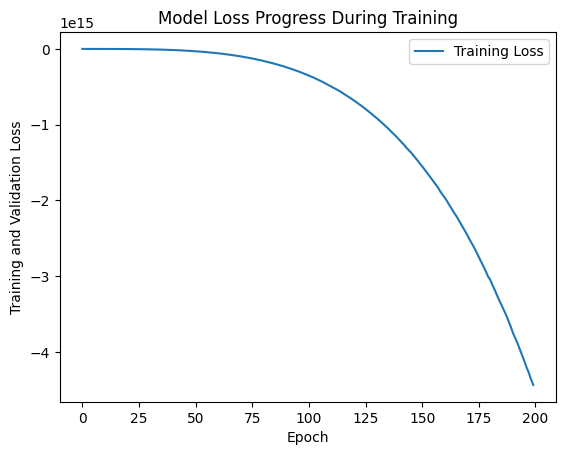

In [96]:
import matplotlib.pyplot as plt
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])


In [97]:

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87      4152
           2       0.00      0.00      0.00       805
           3       0.00      0.00      0.00       441

    accuracy                           0.77      5398
   macro avg       0.26      0.33      0.29      5398
weighted avg       0.59      0.77      0.67      5398



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Xgboost

In [43]:
!pip install xgboost


In [48]:
# Train an XGBoost classifier model
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# ... (your existing code) ...

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Use the same encoder for the test set

# Define XGBoost model with optimized parameters
XGB_model = xgb.XGBClassifier(
    objective='multi:softmax',  # Multiclass classification
    num_class=3,  # Number of classes in y
    # ... (rest of your XGBoost parameters) ...
)

# Train the model using the encoded target variable
XGB_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [49]:
# ... (previous code) ...

# Evaluate on training set (using encoded target)
result_train = XGB_model.score(X_train, y_train_encoded)
print("Training Accuracy : {}".format(result_train))

# ... (further code for prediction and evaluation on test set) ...

Training Accuracy : 0.9545665061133753


In [58]:

# predict the score of the trained model using the testing dataset


result_test = XGB_model.score(X_test, y_test_encoded)  # Use y_test_encoded and X_test_scaled
print("Test Accuracy : {}".format(result_test))


Test Accuracy : 0.8262319377547239


In [65]:

# Make predictions on the scaled test data
y_predict = XGB_model.predict(X_test)

In [66]:
from sklearn.metrics import confusion_matrix, classification_report

# ... (your previous code for training and prediction) ...

# Option 1: Decode the predictions back to original labels
y_predict_decoded = label_encoder.inverse_transform(y_predict)  # Assuming label_encoder is defined earlier
print(classification_report(y_test, y_predict_decoded))

# Option 2: Use the encoded

              precision    recall  f1-score   support

           1       0.88      0.94      0.91      4152
           2       0.61      0.50      0.55       805
           3       0.51      0.34      0.40       441

    accuracy                           0.83      5398
   macro avg       0.67      0.59      0.62      5398
weighted avg       0.81      0.83      0.81      5398



### xgboost tuning


In [67]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score  # Or any other relevant metric

# ... (your previous code for data preparation and encoding) ...

# Define the parameter grid for Randomized Search
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 150, 200],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0, 1, 2, 3],
    'reg_alpha': [0, 1, 2, 3]
}

# Create an XGBoost classifier object
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=xgb_classifier,
    param_distributions=param_grid,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train_encoded)

# Get the best model and its hyperparameters
best_xgb_model = random_search.best_estimator_
best_params = random_search.best_params_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Test Accuracy:", accuracy)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Test Accuracy: 0.8393849573916266
Best Hyperparameters: {'subsample': 1.0, 'reg_lambda': 1, 'reg_alpha': 2, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}


In [79]:
# Create an XGBoost classifier with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    subsample=1.0,
    reg_lambda=1,
    reg_alpha=2,
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    gamma=0.1,
    colsample_bytree=1.0,
    random_state=42  # Optional: For reproducibility
)

# Train the model
best_xgb_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [80]:
result_train = XGB_model.score(X_train, y_train_encoded)
print("Training Accuracy : {}".format(result_train))


Training Accuracy : 0.9545665061133753


In [81]:
result_test = XGB_model.score(X_test, y_test_encoded)  # Use y_test_encoded and X_test_scaled
print("Test Accuracy : {}".format(result_test))

Test Accuracy : 0.8262319377547239


In [82]:

# Make predictions on the scaled test data
y_predict = XGB_model.predict(X_test)

In [83]:
from sklearn.metrics import confusion_matrix, classification_report

# ... (your previous code for training and prediction) ...

# Option 1: Decode the predictions back to original labels
y_predict_decoded = label_encoder.inverse_transform(y_predict)  # Assuming label_encoder is defined earlier
print(classification_report(y_test, y_predict_decoded))

# Option 2: Use the encoded

              precision    recall  f1-score   support

           1       0.88      0.94      0.91      4152
           2       0.61      0.50      0.55       805
           3       0.51      0.34      0.40       441

    accuracy                           0.83      5398
   macro avg       0.67      0.59      0.62      5398
weighted avg       0.81      0.83      0.81      5398



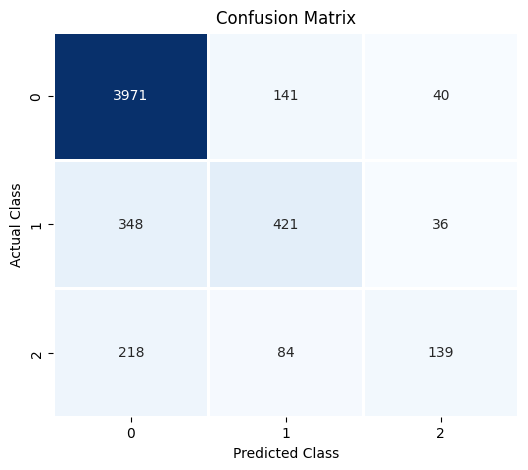

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)  # FIXED: y_test comes first!

# Create heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=1, cbar=False)

# Labels
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()


### Logistic Regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.8341978510559467
              precision    recall  f1-score   support

           1       0.87      0.96      0.91      4152
           2       0.64      0.52      0.58       805
           3       0.70      0.23      0.35       441

    accuracy                           0.83      5398
   macro avg       0.74      0.57      0.61      5398
weighted avg       0.82      0.83      0.81      5398



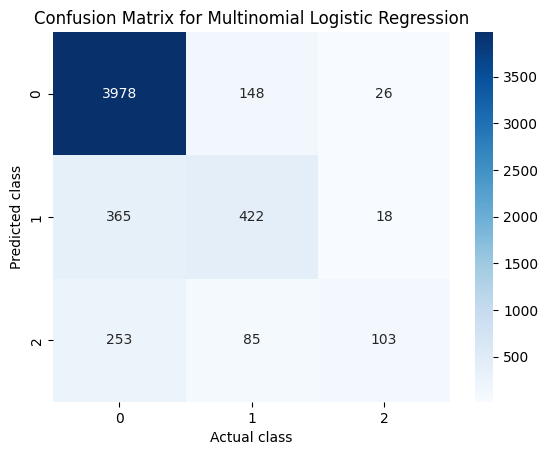

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code for data loading and preprocessing) ...

# Create a LogisticRegression model with the 'multinomial' solver
model_LR = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
# 'lbfgs' is a good solver for multinomial problems
# Increased max_iter to potentially improve convergence

# Fit the model to the training data
model_LR.fit(X_train, y_train)

# Predict on the test data
y_predict = model_LR.predict(X_test)

# Evaluate the model
print("Accuracy:", model_LR.score(X_test, y_test))
print(classification_report(y_test, y_predict))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_predict)  # Corrected order of arguments
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Predicted class')
plt.xlabel('Actual class')
plt.title("Confusion Matrix for Multinomial Logistic Regression")
plt.show()

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code for data loading and preprocessing) ...

# Define the parameter grid for tuning
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization type
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse)
    'solver': ['lbfgs', 'newton-cg', 'sag', 'saga'],  # Solver algorithms
    'max_iter': [100, 500, 1000]  # Maximum iterations for convergence
}

# Create a LogisticRegression model
model_LR = LogisticRegression(multi_class='multinomial')

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=model_LR,
    param_grid=param_grid,
    scoring='accuracy',  # Use an appropriate scoring metric
    cv=5,  # Number of cross-validation folds
    verbose=2,  # Print details during the search
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_LR_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Evaluate the best model on the test set
y_predict = best_LR_model.predict(X_test)
print("Accuracy:", best_LR_model.score(X_test, y_test))
print(classification_report(y_test, y_predict))

# ... (rest of your code for confusion matrix and plotting) ...


Fitting 5 folds for each of 144 candidates, totalling 720 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solv

Accuracy: 0.8347536124490552
              precision    recall  f1-score   support

           1       0.87      0.96      0.91      4152
           2       0.64      0.53      0.58       805
           3       0.70      0.24      0.35       441

    accuracy                           0.83      5398
   macro avg       0.74      0.57      0.61      5398
weighted avg       0.82      0.83      0.82      5398

